<h1 align="center"><u><font color ='maroon'>PRACTICE PROJECT-1</font></u></h1>
<h1 align="center"><u><font color='red'> Salary Project </font><u></h1>
<h2 align="center"> To Predict the salary of the employee using the features provided in the data.

<h2><u><font color='green'>First - Step1:</font></u> Import Libraries.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

<h2><u><font color='green'>NEXT - Step2:</font></u>Read the CSV from the github URL.

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


<h2><u><font color='green'>NEXT - Step3:</font></u> Rearranging columns and dropping unnecessary columns.</h2>
<h4><br> Re-arranging columns to make it more easier to read.
    <br> Assuming all Columns are required for the model
    

In [4]:
ndf=df.iloc[:,[4,0,1,2,3,5]]


ndf.head()

,sex,rank,discipline,yrs.since.phd,yrs.service,salary
0,Male,Prof,B,19,18,139750
1,Male,Prof,B,20,16,173200
2,Male,AsstProf,B,4,3,79750
3,Male,Prof,B,45,39,115000
4,Male,Prof,B,40,41,141500


<h2><u><font color='green'>NEXT - Step4:</font></u>Changing name of columns appropriately and checking the Type of each column.</h2>
    <br><h4>Modifying the Name of columns to avoid "."
    <br>Ensuring the types are correct for the further transformations.

In [5]:
ndf.columns=['Gender', 'Designition','Discipline', 'Years_afterPhD', 'Total_Service','Salary']
ndf

,Gender,Designition,Discipline,Years_afterPhD,Total_Service,Salary
0,Male,Prof,B,19,18,139750
1,Male,Prof,B,20,16,173200
2,Male,AsstProf,B,4,3,79750
3,Male,Prof,B,45,39,115000
4,Male,Prof,B,40,41,141500
...,...,...,...,...,...,...
392,Male,Prof,A,33,30,103106
393,Male,Prof,A,31,19,150564
394,Male,Prof,A,42,25,101738
395,Male,Prof,A,25,15,95329


In [6]:
ndf.dtypes

Gender            object
Designition       object
Discipline        object
Years_afterPhD     int64
Total_Service      int64
Salary             int64
dtype: object

<h4>It is seen that there are 3 object datatypes, where none of them hold float values. there are categorical data, whether M or F, A-grade or B-grade, or types of designitions.<br>
Since its not possible to compare or plot strings(objects) vs integers, we need to convert the dtype categorically</h3>
    <h5><font color='maroon'><br><u>Gender</u>: viz M or F will be 1 or 2<br>
    <br><u>Designition</u>: Viz Prof,AssocProf,AsstProf will be 1,2,3. Note: Generally, Associate is lower than assistant in rank, but on analysing the data, it is seen that Assocprof have more salary and Experience than AsstProf. hence assuming it is in the order Prof>AssocProf>AsstProf.<br>
    <br><u> Discipline</u>: Which im assuming is similar to Office Character certifiate has only two categories, A or B, which can be converted as 1 or 2

<h2><u><font color='green'>NEXT - Step5:</font></u>Encoding Columns with Catagorical string data to numerical data using the above assumptions

In [ ]:
#ndf['Gender'].replace(['Male', 'Female'],[1, 0], inplace=True)
#ndf['Designition'].replace(['Prof','AssocProf','AsstProf'],[1,2,3], inplace=True)
#ndf['Discipline'].replace(['A','B'],[1,2], inplace=True)



In [ ]:
#ndf['Gender'] = ndf['Gender'].astype('category')
#ndf['Designition'] = ndf['Designition'].astype('category')
#ndf['Discipline'] = ndf['Discipline'].astype('category')
#ndf.dtypes

In [7]:
Gender_M = pd.get_dummies(ndf['Gender'], prefix='Gender', drop_first=True)
Gender_M.head(3)

,Gender_Male
0,1
1,1
2,1


In [18]:
Discipline_B = pd.get_dummies(ndf['Discipline'], prefix='Discipline', drop_first=True)
Discipline_B.head()

,Discipline_B
0,1
1,1
2,1
3,1
4,1


In [8]:
Prof_t = pd.get_dummies(ndf['Designition'])
AsstP_t=pd.get_dummies(ndf['Designition'])
Prof_t

,AssocProf,AsstProf,Prof
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
392,0,0,1
393,0,0,1
394,0,0,1
395,0,0,1


In [13]:
#Prof_t.drop(columns='AssocProf', inplace=True)
AsstP_t.drop(columns='Prof', inplace=True)
AsstP_t
#Prof_t

,AsstProf
0,0
1,0
2,1
3,0
4,0
...,...
392,0
393,0
394,0
395,0


In [14]:
ndf

,Gender,Designition,Discipline,Years_afterPhD,Total_Service,Salary
0,Male,Prof,B,19,18,139750
1,Male,Prof,B,20,16,173200
2,Male,AsstProf,B,4,3,79750
3,Male,Prof,B,45,39,115000
4,Male,Prof,B,40,41,141500
...,...,...,...,...,...,...
392,Male,Prof,A,33,30,103106
393,Male,Prof,A,31,19,150564
394,Male,Prof,A,42,25,101738
395,Male,Prof,A,25,15,95329


In [15]:
nudf=pd.concat([ndf, Prof_t, AsstP_t], axis=1)

In [16]:
nudf.drop(columns='Designition', inplace=True)
nudf

,Gender,Discipline,Years_afterPhD,Total_Service,Salary,Prof,AsstProf
0,Male,B,19,18,139750,1,0
1,Male,B,20,16,173200,1,0
2,Male,B,4,3,79750,0,1
3,Male,B,45,39,115000,1,0
4,Male,B,40,41,141500,1,0
...,...,...,...,...,...,...,...
392,Male,A,33,30,103106,1,0
393,Male,A,31,19,150564,1,0
394,Male,A,42,25,101738,1,0
395,Male,A,25,15,95329,1,0


In [19]:
Ndf=pd.concat([nudf, Discipline_B, Gender_M], axis=1)
Ndf

,Gender,Discipline,Years_afterPhD,Total_Service,Salary,Prof,AsstProf,Discipline_B,Gender_Male
0,Male,B,19,18,139750,1,0,1,1
1,Male,B,20,16,173200,1,0,1,1
2,Male,B,4,3,79750,0,1,1,1
3,Male,B,45,39,115000,1,0,1,1
4,Male,B,40,41,141500,1,0,1,1
...,...,...,...,...,...,...,...,...,...
392,Male,A,33,30,103106,1,0,0,1
393,Male,A,31,19,150564,1,0,0,1
394,Male,A,42,25,101738,1,0,0,1
395,Male,A,25,15,95329,1,0,0,1


In [23]:
#Ndf.drop(columns='Discipline', inplace=True)
Ndf

,Years_afterPhD,Total_Service,Salary,Prof,AsstProf,Discipline_B,Gender_Male
0,19,18,139750,1,0,1,1
1,20,16,173200,1,0,1,1
2,4,3,79750,0,1,1,1
3,45,39,115000,1,0,1,1
4,40,41,141500,1,0,1,1
...,...,...,...,...,...,...,...
392,33,30,103106,1,0,0,1
393,31,19,150564,1,0,0,1
394,42,25,101738,1,0,0,1
395,25,15,95329,1,0,0,1


In [24]:
mdf=Ndf.iloc[:,[3,4,5,6,0,1,2]]
mdf.dtypes

Prof              uint8
AsstProf          uint8
Discipline_B      uint8
Gender_Male       uint8
Years_afterPhD    int64
Total_Service     int64
Salary            int64
dtype: object

In [25]:
#mdf['Prof','AsstProf','Discipline_B','Gender_Male'] = mdf['Prof','AsstProf','Discipline_B','Gender_Male'].astype('category')
mdf['Prof'] = mdf['Prof'].astype('int64')
mdf['AsstProf'] = mdf['AsstProf'].astype('int64')
mdf['Discipline_B'] = mdf['Discipline_B'].astype('int64')
mdf['Gender_Male'] = mdf['Gender_Male'].astype('int64')
mdf.dtypes

Prof              int64
AsstProf          int64
Discipline_B      int64
Gender_Male       int64
Years_afterPhD    int64
Total_Service     int64
Salary            int64
dtype: object

<h2><u><font color='green'>NEXT - Step6:</font></u>Checking for Null values.

In [44]:
mdf

,Prof,AsstProf,Discipline_B,Gender_Male,Years_afterPhD,Total_Service,Salary
0,1.0,0.0,1.0,1.0,19,18.0,139750
1,1.0,0.0,1.0,1.0,20,16.0,173200
2,0.0,1.0,1.0,1.0,4,3.0,79750
3,1.0,0.0,1.0,1.0,45,39.0,115000
4,1.0,0.0,1.0,1.0,40,41.0,141500
...,...,...,...,...,...,...,...
392,1.0,0.0,0.0,1.0,33,30.0,103106
393,1.0,0.0,0.0,1.0,31,19.0,150564
394,1.0,0.0,0.0,1.0,42,25.0,101738
395,1.0,0.0,0.0,1.0,25,15.0,95329


<h2><u><font color='green'>NEXT - Step7:</font></u> Outliers:</h2><br><h4>Determining the outliers using Boxplot and removing their instances as we have enough Samples for training.

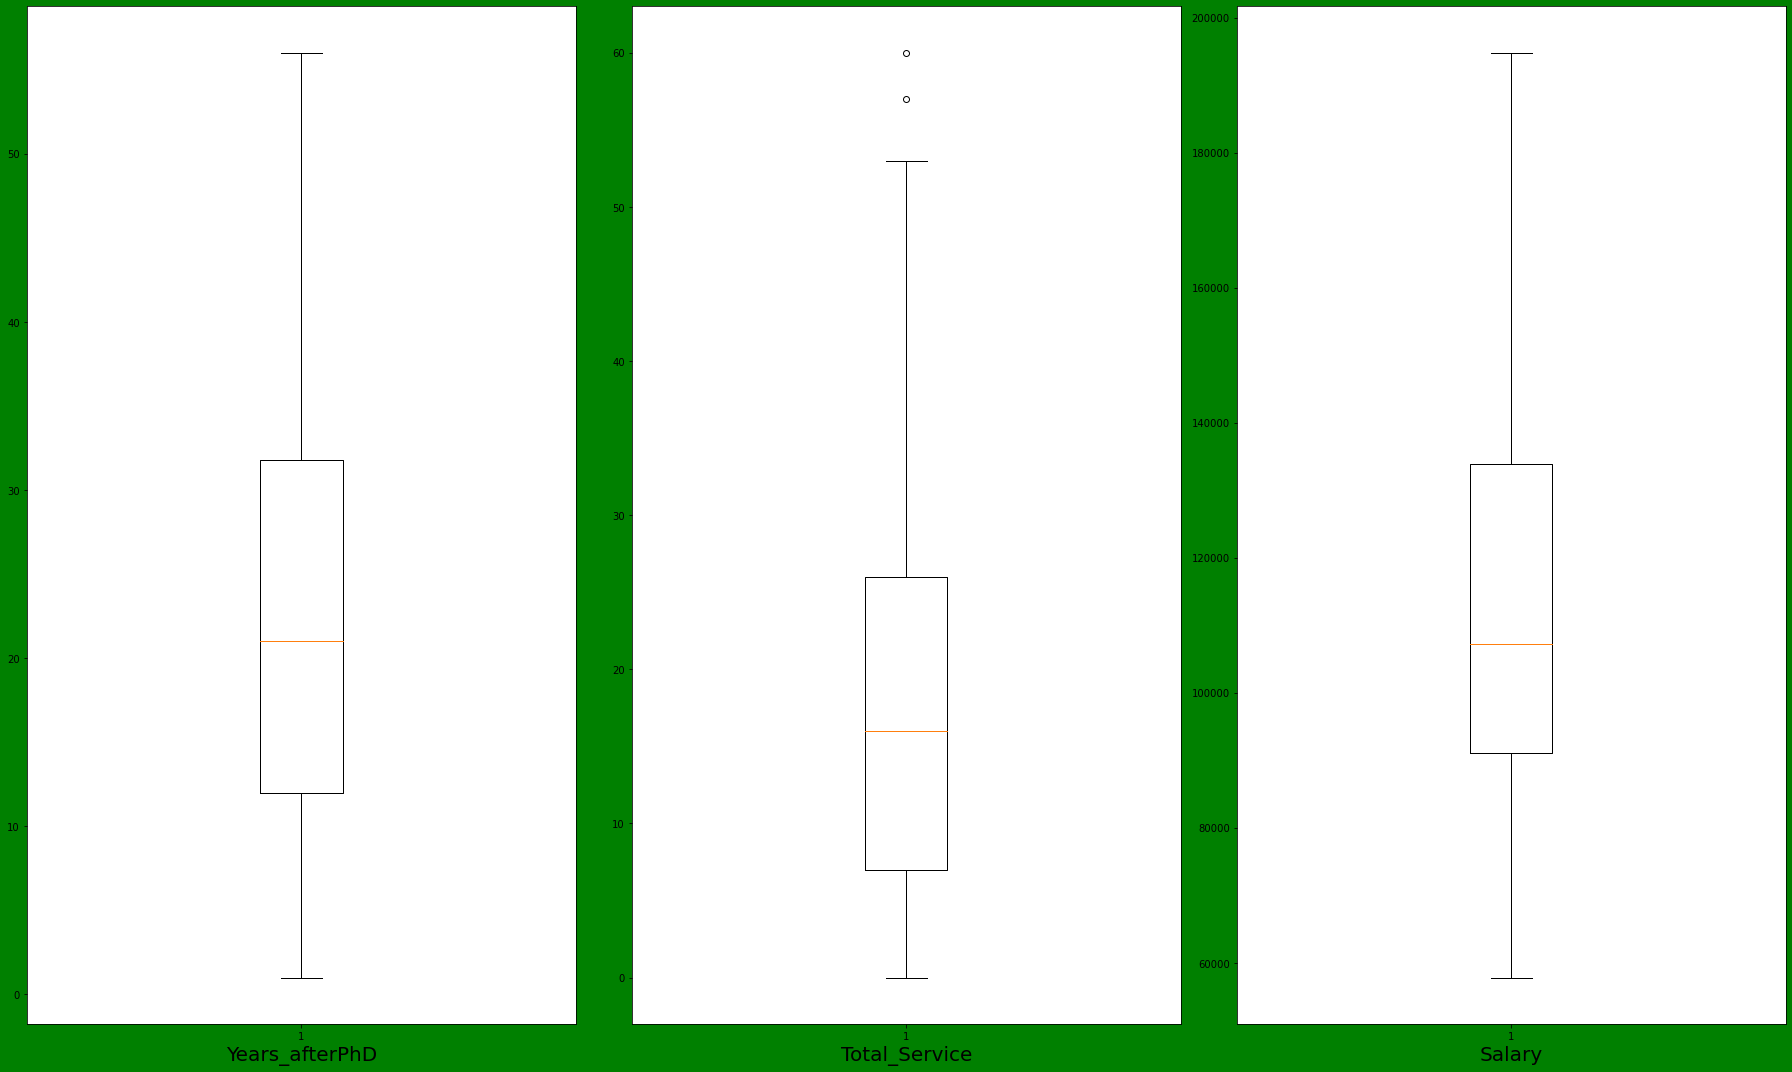

In [45]:
plt.figure(figsize=(25,15),facecolor='green')
plotnumber = 1

for column in mdf.drop(['Prof','AsstProf','Discipline_B','Gender_Male'], axis=1):
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        plt.boxplot(mdf.drop(['Prof','AsstProf','Discipline_B','Gender_Male'], axis=1)[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h5><font color='maroon'> Looking at the above plots of integer data, we can see that there is one outlier for total service, and a couple of outliers in a rather tight mean in the salary boxplot.
    <br><br>
    clearing the rows which have outliers in the salary column only.

In [46]:
print(np.where(mdf['Salary']>200000))

(array([], dtype=int64),)


In [47]:
#mdf.drop([43,249,364], axis=0, inplace=True)
mdf.head(50)

,Prof,AsstProf,Discipline_B,Gender_Male,Years_afterPhD,Total_Service,Salary
0,1.0,0.0,1.0,1.0,19,18.0,139750
1,1.0,0.0,1.0,1.0,20,16.0,173200
2,0.0,1.0,1.0,1.0,4,3.0,79750
3,1.0,0.0,1.0,1.0,45,39.0,115000
4,1.0,0.0,1.0,1.0,40,41.0,141500
5,0.0,0.0,1.0,1.0,6,6.0,97000
6,1.0,0.0,1.0,1.0,30,23.0,175000
7,1.0,0.0,1.0,1.0,45,45.0,147765
8,1.0,0.0,1.0,1.0,21,20.0,119250
9,1.0,0.0,1.0,0.0,18,18.0,129000


<h2><u><font color='green'>NEXT - Step8:</font></u> Distribution:</h2><br><h4>Check to see if the Columns to be selected as features and label, are in Normal Distribution. <br>Which is also an important factor in determining if we need to use Linear Regression

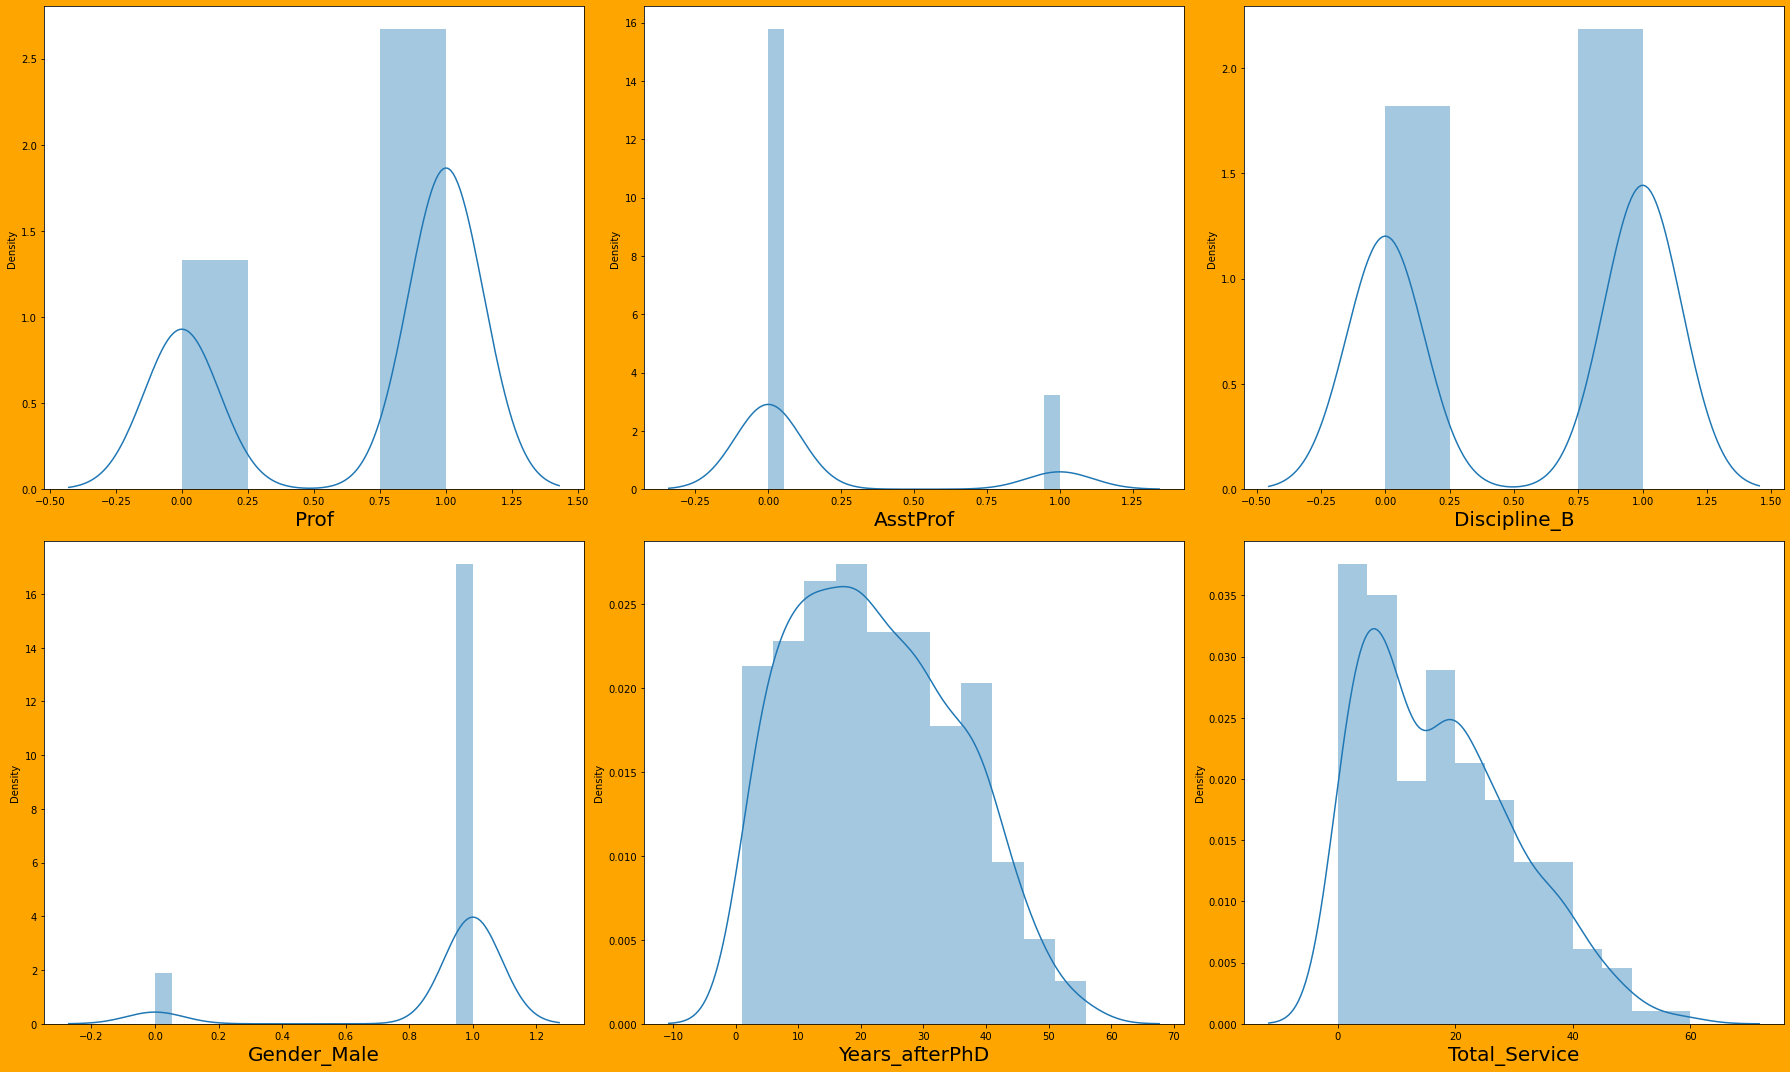

In [48]:
plt.figure(figsize=(25,15),facecolor='orange')
plotnumber = 1

for column in mdf:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(mdf[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h2><u><font color='green'>NEXT - Step9:</font></u></h2><h3> Dividing columns as features and label</h3><br>
<h4> For Features: using ndf except Salary <br>
    For Label: using salary.<br> 

In [49]:

y= mdf['Salary']

x=mdf.drop(columns = ['Salary'])
x.tail(50)

,Prof,AsstProf,Discipline_B,Gender_Male,Years_afterPhD,Total_Service
346,1.0,0.0,1.0,1.0,41,27.0
347,1.0,0.0,1.0,1.0,39,33.0
348,0.0,1.0,1.0,1.0,4,3.0
349,1.0,0.0,1.0,1.0,27,28.0
350,1.0,0.0,1.0,1.0,56,49.0
351,1.0,0.0,1.0,1.0,38,38.0
352,1.0,0.0,1.0,1.0,26,27.0
353,1.0,0.0,1.0,1.0,22,20.0
354,0.0,1.0,1.0,1.0,8,1.0
355,1.0,0.0,1.0,1.0,25,21.0


<<h2><u><font color='green'>NEXT - Step10:</font></u> Checking feature vs label plot</h2><br><h4> using Scatter plot from matplotlib

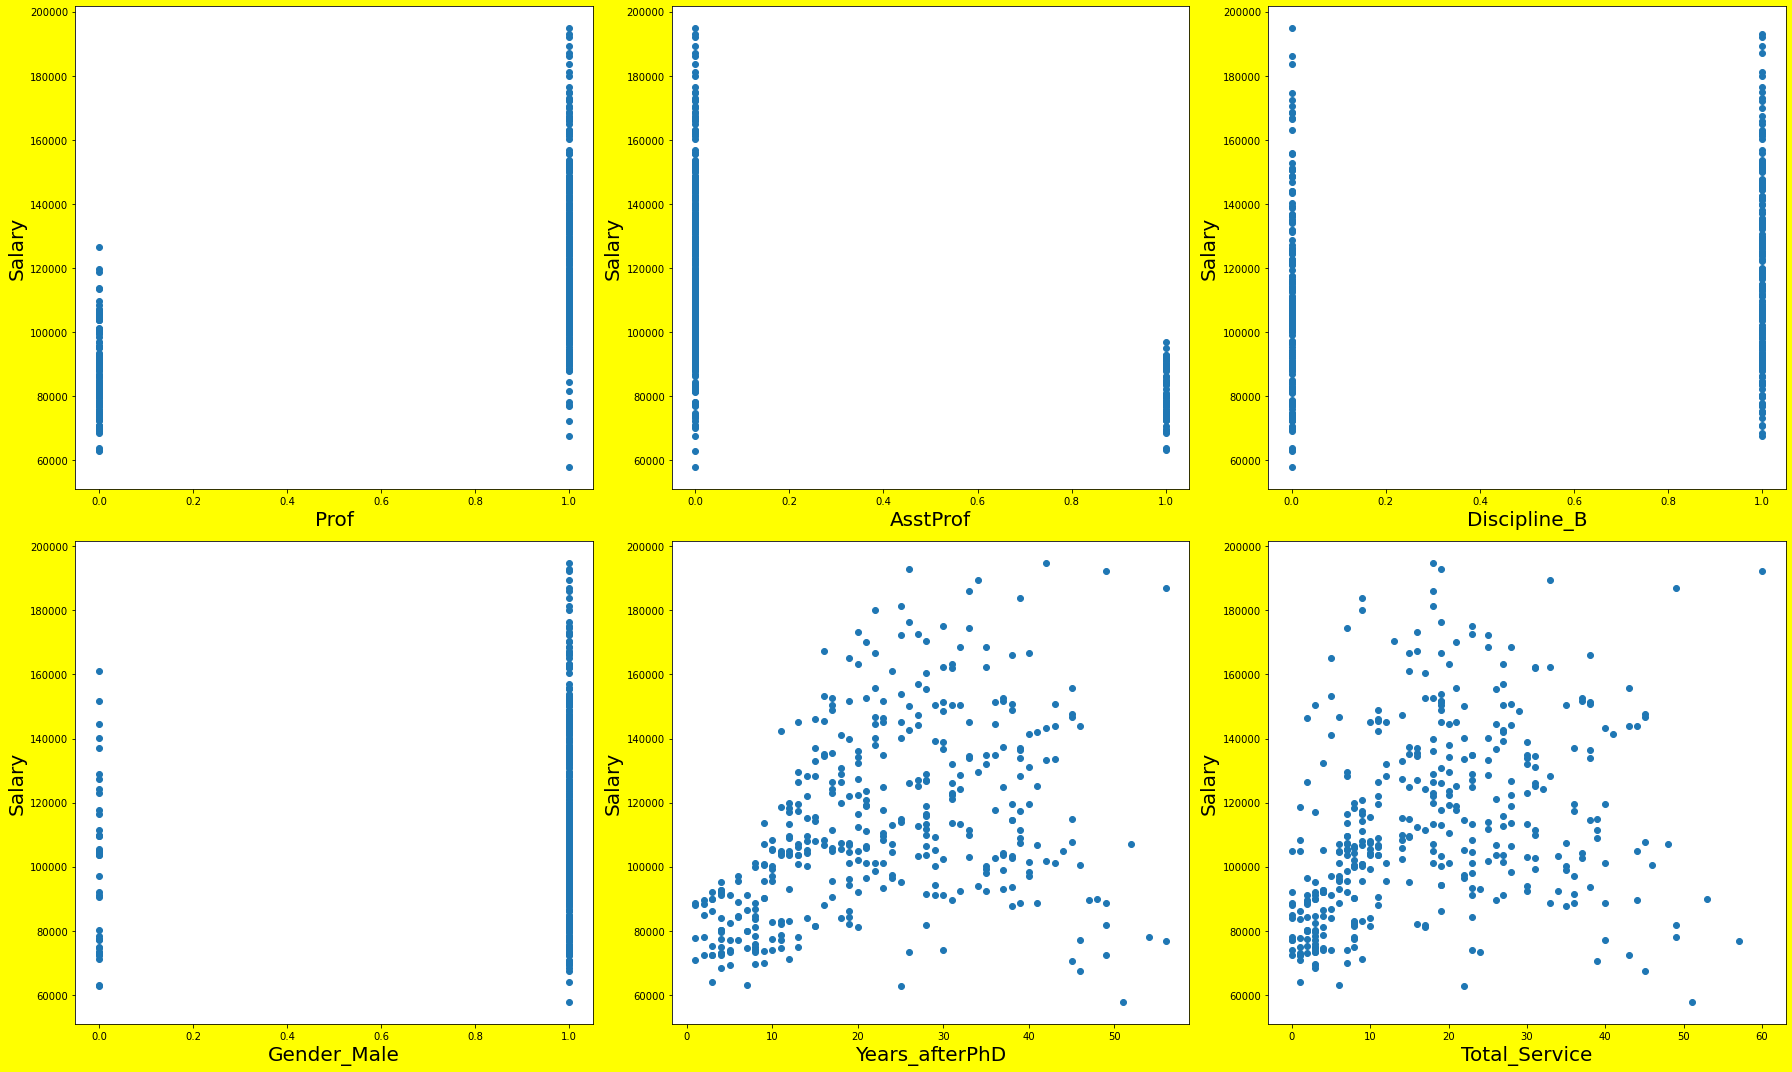

In [50]:
plt.figure(figsize=(25,15),facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Salary',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h5><font color='maroon'>Study:
 <br>   All features have an effect on the total salary of the emplyee.
 <br>   PhD experience and Total service have the maximum impact. <br><br> >>>>>A professor is seen to be making alot more than an assist or assoc.
                                                                  <br><br>   >>>>>Discipline marginally affects the salary.
                                                                  <br><br>  >>>>>Gender too(unfortunately) impact the total salary.
            <br/> It is also found that the feature to label relationship is fairly linear at the least.hence we can predict based on a Linear regression model.

<h2><u><font color='green'>NEXT - Step11:</font></u> Standardistaion of Feature Data</h2><br><h4>An important step in ensuring a successful model.

In [51]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [52]:
x_scaled

array([[ 0.70576119, -0.45265104,  0.91244624,  0.33145008, -0.24949229,
         0.03672373],
       [ 0.70576119, -0.45265104,  0.91244624,  0.33145008, -0.17166176,
        -0.11802652],
       [-1.41690987,  2.20920733,  0.91244624,  0.33145008, -1.41695029,
        -1.12390312],
       ...,
       [ 0.70576119, -0.45265104, -1.09595498,  0.33145008,  1.54060997,
         0.57834959],
       [ 0.70576119, -0.45265104, -1.09595498,  0.33145008,  0.21749091,
        -0.19540164],
       [-1.41690987,  2.20920733, -1.09595498,  0.33145008, -1.10562816,
        -1.046528  ]])

<h2><u><font color='green'>NEXT - Step12:</font></u> Splitting Data for Training and testing</h2><br><h4>An important step in ensuring a successful model.<br>Higher test_sizes give a better approximation.

In [53]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.75, random_state=4999899)
y_train.head()

334    104542
102    153303
105    113543
79      84240
319    135027
Name: Salary, dtype: int64

<h2><u><font color='green'>NEXT - Step13:</font></u> Model Instantiating and Training of Data</h2><br><h4>We are using Linear regression for the computation, as the problem statement satisfies all of its conditions.

In [54]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [55]:
x.head(10)#--- for ref

,Prof,AsstProf,Discipline_B,Gender_Male,Years_afterPhD,Total_Service
0,1.0,0.0,1.0,1.0,19,18.0
1,1.0,0.0,1.0,1.0,20,16.0
2,0.0,1.0,1.0,1.0,4,3.0
3,1.0,0.0,1.0,1.0,45,39.0
4,1.0,0.0,1.0,1.0,40,41.0
5,0.0,0.0,1.0,1.0,6,6.0
6,1.0,0.0,1.0,1.0,30,23.0
7,1.0,0.0,1.0,1.0,45,45.0
8,1.0,0.0,1.0,1.0,21,20.0
9,1.0,0.0,1.0,0.0,18,18.0


In [56]:
mdf.head(10)#--for ref

,Prof,AsstProf,Discipline_B,Gender_Male,Years_afterPhD,Total_Service,Salary
0,1.0,0.0,1.0,1.0,19,18.0,139750
1,1.0,0.0,1.0,1.0,20,16.0,173200
2,0.0,1.0,1.0,1.0,4,3.0,79750
3,1.0,0.0,1.0,1.0,45,39.0,115000
4,1.0,0.0,1.0,1.0,40,41.0,141500
5,0.0,0.0,1.0,1.0,6,6.0,97000
6,1.0,0.0,1.0,1.0,30,23.0,175000
7,1.0,0.0,1.0,1.0,45,45.0,147765
8,1.0,0.0,1.0,1.0,21,20.0,119250
9,1.0,0.0,1.0,0.0,18,18.0,129000


<h3>Initial Prediction

In [57]:
print('Salary of Employee could be:', regression.predict(scaler.transform([[1,0,1,0,18,18]]))) #------ #9data

Salary of Employee could be: [120694.28744604]


<h2><u><font color='green'>NEXT - Step14:</font></u> Pickles</h2><br><h4>Pickling up the Process for later use.(Saving) 
  

In [58]:
#pickle
pickle.dump(regression, open('new_sal', 'wb'))

In [59]:
#open

loaded_model=pickle.load(open('new_sal','rb'))
a= loaded_model.predict(scaler.transform([[1,0,1,1,45,45]])) #-----#8 data
a

array([137156.0979689])

<h2><u><font color='green'>NEXT - Step15:</font></u> Checking the percentage of Accuracy of model</h2><br><h4>An important step in determining the success rate of the model

In [60]:
regression.score(x_train,y_train)

0.49421521984607253

In [61]:
regression.score(x_test,y_test)

0.4144664128209282

<h4><font color='maroon'>The success rate is only about 41.44%, as seen above. Model is a failure